In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from sklearn.preprocessing import MinMaxScaler
from math import sqrt

In [24]:
dataset=pd.read_csv('cancer_reg.csv')

<AxesSubplot:>

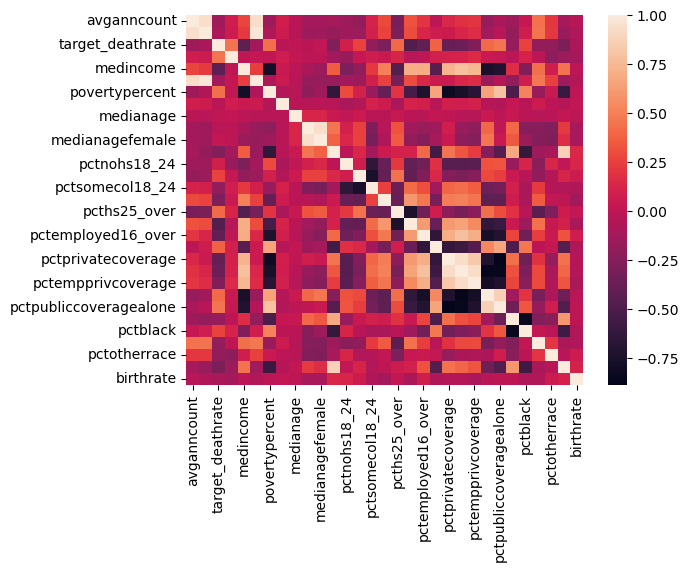

In [25]:
sns.heatmap(dataset.corr( ), annot=False)

In [26]:
dataset = dataset.drop('pctsomecol18_24', axis=1) # Remove pctsomecol18_24 
dataset = dataset.drop('binnedinc', axis=1) # Remove pctsomecol18_24 
dataset = dataset.drop('geography', axis=1) # Remove pctsomecol18_24 

In [27]:
df = dataset.astype('float32') #Convert all data to float32 type 
df.fillna(df.mean(), inplace=True) #replace the zero values by the mean 

In [28]:
scaler = MinMaxScaler() # scale the data using minmax scaler
scaler.fit(df)
df[:] = scaler.fit_transform(df[:])
df_scaled = pd.DataFrame(df[:], columns=df.columns[:])
df_scaled

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,0.036467,0.033269,0.347080,0.286893,0.381164,0.025498,0.180995,0.051192,0.028253,0.342790,...,0.518255,0.491259,0.402597,0.259091,0.797112,0.030190,0.113138,0.043965,0.542157,0.286917
1,0.004378,0.004783,0.335203,0.209129,0.247459,0.004173,0.348416,0.002367,0.017783,0.231679,...,0.602848,0.526224,0.369202,0.288636,0.880051,0.011275,0.052704,0.089228,0.406297,0.203182
2,0.002517,0.003355,0.379413,0.147574,0.259314,0.001986,0.257919,0.004872,0.037726,0.510638,...,0.439873,0.374126,0.573284,0.420455,0.898912,0.008606,0.010932,0.065522,0.571001,0.174879
3,0.011037,0.014207,0.445728,0.227824,0.209748,0.007380,0.314480,0.035098,0.034070,0.468085,...,0.389241,0.375874,0.632653,0.509091,0.908071,0.009106,0.027250,0.032498,0.508852,0.215878
4,0.001337,0.001642,0.279446,0.147971,0.265207,0.000934,0.210407,0.000000,0.043211,0.600473,...,0.446203,0.377622,0.608534,0.456818,0.934344,0.003144,0.015623,0.011737,0.563423,0.318700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,0.051297,0.000857,0.296602,0.250845,0.236138,0.000542,0.208145,0.000000,0.036397,0.442080,...,0.620253,0.543706,0.380334,0.240909,0.891769,0.044652,0.007687,0.040555,0.509620,0.364506
3043,0.051297,0.002856,0.298251,0.250845,0.252138,0.003569,0.352941,0.038636,0.013462,0.163121,...,0.594937,0.613636,0.326531,0.343182,0.729471,0.027072,0.094908,0.336995,0.526760,0.383870
3044,0.051297,0.003070,0.310789,0.250845,0.276751,0.003315,0.266968,0.201690,0.014293,0.191489,...,0.583861,0.599650,0.285714,0.322727,0.865944,0.026914,0.030889,0.135480,0.583874,0.366179
3045,0.051297,0.003498,0.380403,0.250845,0.272877,0.002437,0.228507,0.000000,0.027755,0.342790,...,0.642405,0.631119,0.339518,0.259091,0.920999,0.013689,0.005740,0.050841,0.644333,0.355570


In [29]:
X = df_scaled.drop(['target_deathrate'], axis=1)
y = df_scaled['target_deathrate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [30]:
pls = PLSRegression(n_components=20) #create PLS model 
pls.fit(X_train, y_train) # fit model to training data 

PLSRegression(n_components=20)

In [31]:
y_pred_train = pls.predict(X_train)
y_pred_test = pls.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
print("Training R^2 for PLS Model: ", r2_train*100)

r2_test = r2_score(y_test, y_pred_test)
print("Testing R^2 for PLS Model: ", r2_test*100)

RMSE_train = sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE for Training Data: ", RMSE_train)

RMSE_test = sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE for Testing Data: ", RMSE_test)

Training R^2 for PLS Model:  53.10981967083739
Testing R^2 for PLS Model:  48.5702746947828
RMSE for Training Data:  0.06221800666096513
RMSE for Testing Data:  0.06708902405328346


In [32]:
true_value = y_test
predicted_value = y_pred_test

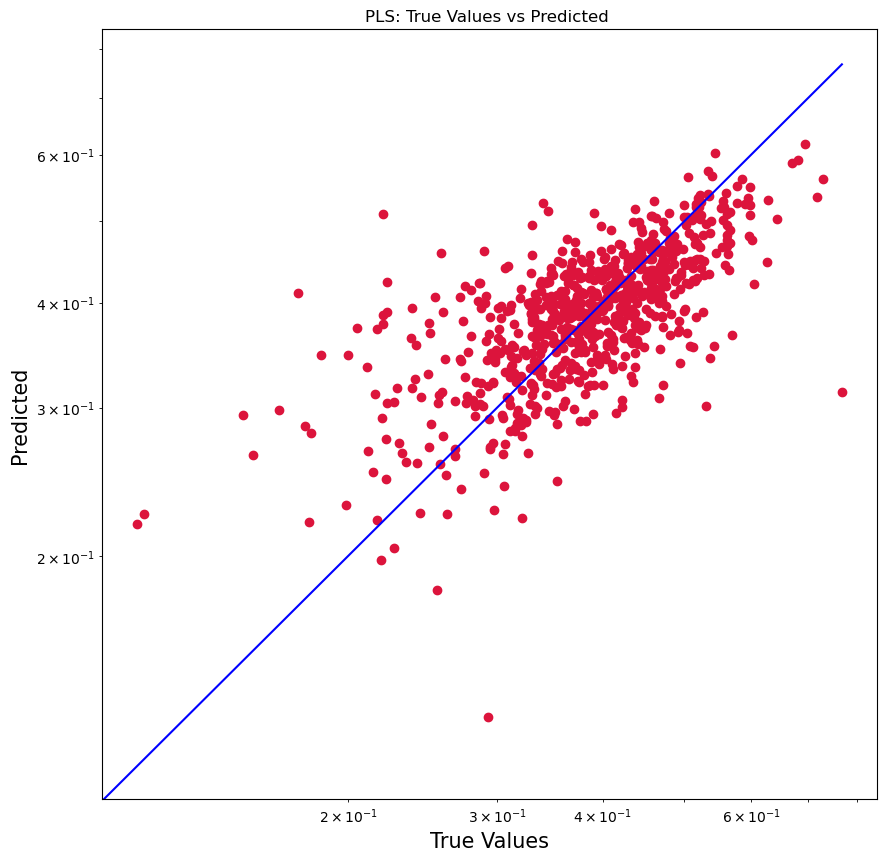

In [33]:
plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("PLS: True Values vs Predicted ")
plt.axis('equal')
plt.show()